<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tf_keras

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization
from keras.models import load_model

In [72]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [73]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [74]:
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

In [75]:
w_init_tanh = initializers.glorot_normal(seed=42)
w_init_relu = initializers.HeNormal(seed=42)
b_init = initializers.Zeros()

In [76]:
def layer_relu(model, neurons):
  model.add(BatchNormalization())
  model.add(layers.Dense(neurons,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init))
  model.add(layers.Dropout(drop_out))
  return model

In [77]:
def layer_tanh(model, neurons):
  model.add(BatchNormalization())
  model.add(layers.Dense(neurons,
                        activation='tanh',
                        kernel_initializer=w_init_tanh,
                        bias_initializer=b_init))
  model.add(layers.Dropout(drop_out))
  return model

In [78]:
model = tf.keras.Sequential()

drop_out = 0.30
neurons = 256

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(drop_out))

model = layer_relu(model, neurons*1)
# model = layer_tanh(model, neurons*1)
model = layer_tanh(model, neurons*2)
model = layer_relu(model, neurons*2)

model.add(layers.Dense(10, activation='softmax'))

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [79]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0007,
                                      beta_1=0.5,
                                      beta_2=0.999,
                                      epsilon=1e-01
)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [80]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              optimizer=optimizer,
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 96ms/step


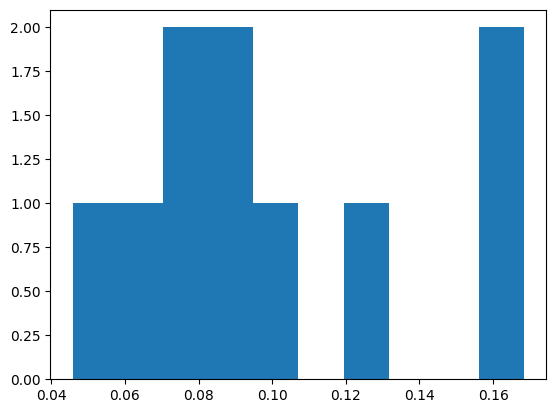

In [81]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [82]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [83]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=50,
                                   restore_best_weights=True,
                                   )
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=40)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='sparse_categorical_accuracy', mode='max', verbose=0, save_best_only=True)


In [84]:
history = model.fit(x_train, y_train,
                    epochs=1500,
                    batch_size=128,
                    # callbacks=[callback],
                    callbacks=[mc, es],
                    verbose=1, #многословие
                    validation_split=0.2
                    # validation_data=(x_val, y_val)
                    )
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/1000
375/375 [==============================] - 6s 7ms/step - loss: 1.4114 - sparse_categorical_accuracy: 0.5196 - val_loss: 0.6559 - val_sparse_categorical_accuracy: 0.7573
Epoch 2/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.9225 - sparse_categorical_accuracy: 0.6715 - val_loss: 0.5898 - val_sparse_categorical_accuracy: 0.7883
Epoch 3/1000
375/375 [==============================] - 2s 7ms/step - loss: 0.8182 - sparse_categorical_accuracy: 0.7070 - val_loss: 0.5504 - val_sparse_categorical_accuracy: 0.8009
Epoch 4/1000
375/375 [==============================] - 3s 7ms/step - loss: 0.7667 - sparse_categorical_accuracy: 0.7214 - val_loss: 0.5386 - val_sparse_categorical_accuracy: 0.8058
Epoch 5/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.7226 - sparse_categorical_accuracy: 0.7344 - val_loss: 0.5157 - val_sparse_categorical_accuracy: 0.8122
Epoch 6/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.6903 - spars

In [85]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


In [86]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 2ms/step - loss: 0.3123 - sparse_categorical_accuracy: 0.8871
[0.3122856914997101, 0.8870999813079834]


In [87]:
saved_model = load_model('best_model.h5')
result = saved_model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.3119 - sparse_categorical_accuracy: 0.8877
[0.3118859827518463, 0.8877000212669373]


In [88]:
# from keras.models import load_model
# saved_model = load_model('best_model.h5')
# # _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Test: %.3f' % (test_acc))

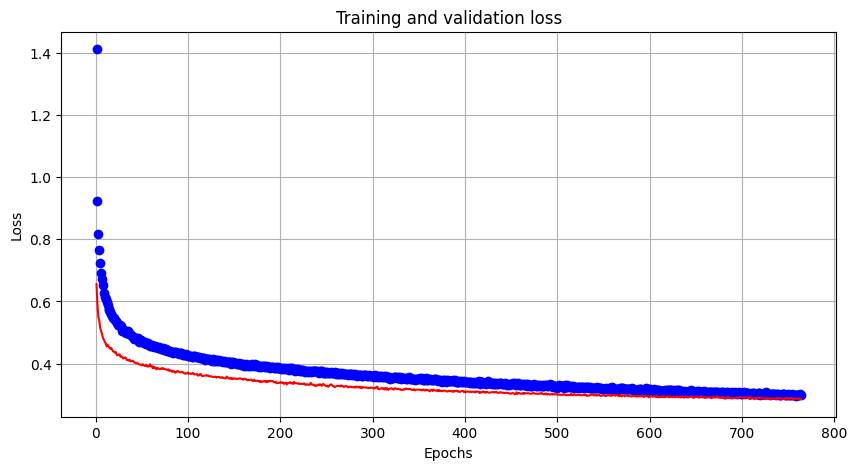

<Figure size 640x480 with 0 Axes>

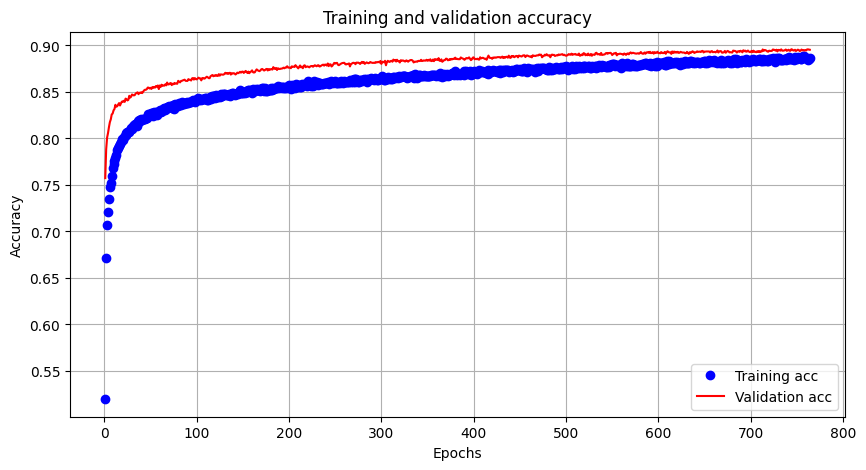

In [89]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
# plt.ylim (0.2, 0.5)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend()
plt.grid(True)
plt.show()
1
plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'r', label='Validation acc')
# plt.ylim (0.88, 0.94)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [90]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [91]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [92]:
predictions[0]

array([0.0854864 , 0.0854864 , 0.0854864 , 0.0854864 , 0.0854864 ,
       0.08554541, 0.0854864 , 0.08646674, 0.0854864 , 0.22958304],
      dtype=float32)

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_12 (Dropout)        (None, 784)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_10 (Ba  (None, 256)               1024      
 tchNormalization)                                    